<a href="https://colab.research.google.com/github/daniela150803/LINEAR-REGRESSION/blob/main/BASE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - Precision: 0.4779 - Recall: 0.2693 - accuracy: 0.5013 - loss: 0.7697 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4500 - val_loss: 0.7475
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - Precision: 0.5258 - Recall: 0.5276 - accuracy: 0.5316 - loss: 0.7283 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6612 - val_loss: 0.6371
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - Precision: 0.5623 - Recall: 0.5054 - accuracy: 0.5450 - loss: 0.7109 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5663 - val_loss: 0.6861
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - Precision: 0.5736 - Recall: 0.6035 - accuracy: 0.5615 - loss: 0.7161 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5238 - val_loss: 0.7082

📈 Generando gráficos...


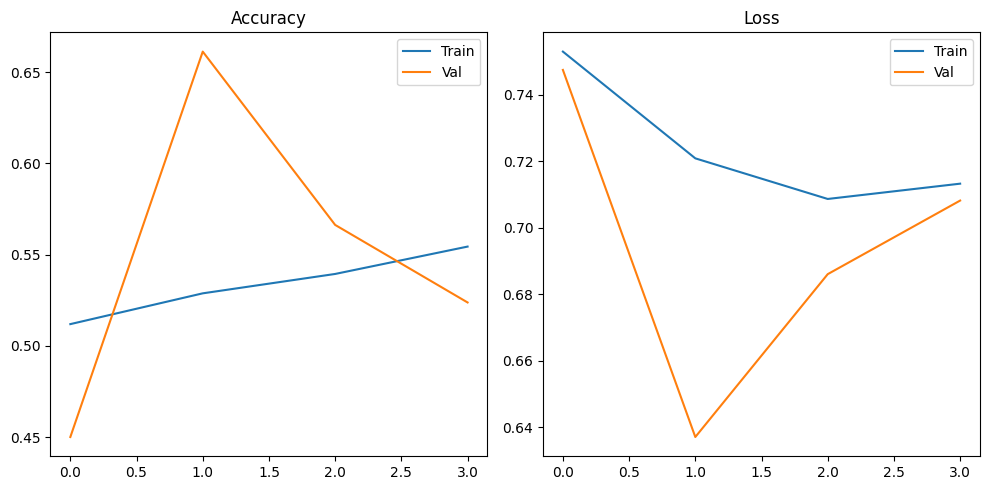

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


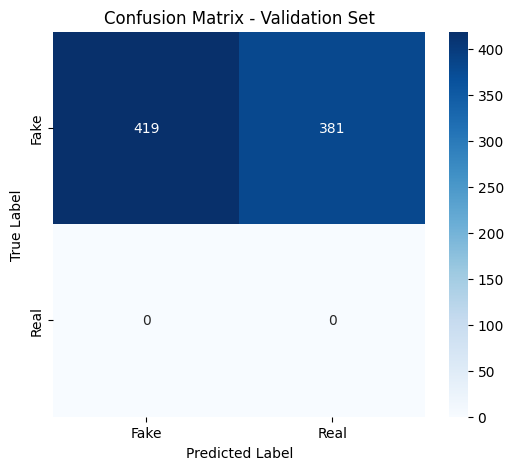

In [3]:

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix

# 1. Paths
base_dir   = "/kaggle/input/deepfake-and-real-images/Dataset"
train_dir  = os.path.join(base_dir, "Train")
val_dir    = os.path.join(base_dir, "Validation")

# 2. Data loader
def create_data_loader(path, batch_size=16, img_size=(224, 224), shuffle=True):
    ds, class_names = image_dataset_from_directory(
        path,
        label_mode="binary",
        image_size=img_size,
        batch_size=batch_size,
        shuffle=shuffle
    ), None
    return ds

train_ds = create_data_loader(train_dir, batch_size=16)
val_ds   = create_data_loader(val_dir,   batch_size=16, shuffle=False)

# 3. Build model
def build_lightweight_model(input_shape=(224,224,3)):
    base = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    base.trainable = False
    x = base.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs=base.input, outputs=out)

model = build_lightweight_model()
model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# 4. Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)],
    verbose=1
)

print("\n📈 Generando gráficos...")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# 5. Confusion Matrix on Validation Set
y_true = []
y_pred = []

for batch_images, batch_labels in val_ds.take(50):
    probs = model.predict(batch_images).ravel()
    preds = (probs >= 0.5).astype(int)
    y_true.extend(batch_labels.numpy().astype(int))
    y_pred.extend(preds.tolist())

# 6. Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Fake','Real']))

# 7. Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
